<a href="https://colab.research.google.com/github/essoun/essoun/blob/main/Copy_of_Logistics_Regression_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression is one of the popular Machine Learning Algorithm that predicts numerical categorical variables. 

It is a supervised Machine Learning Algorithm for the classification. 

You can think this machine learning model as Yes or No answers. 

For example, you have a customer dataset and based on the age group, city, you can create a Logistic Regression to predict the binary outcome of the Customer, that is they will buy or not.

Difference Between the Linear and Logistic Regression:

Linear Regression: In the Linear Regression you are predicting the numerical continuous values from the trained Dataset. That is the numbers are in a certain range.

Logistic Regression: In it, you are predicting the numerical categorical or ordinal values. It means predictions are of discrete values.

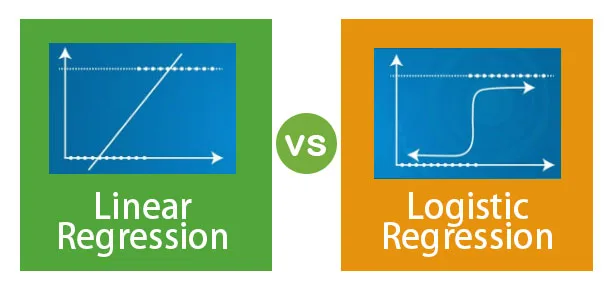

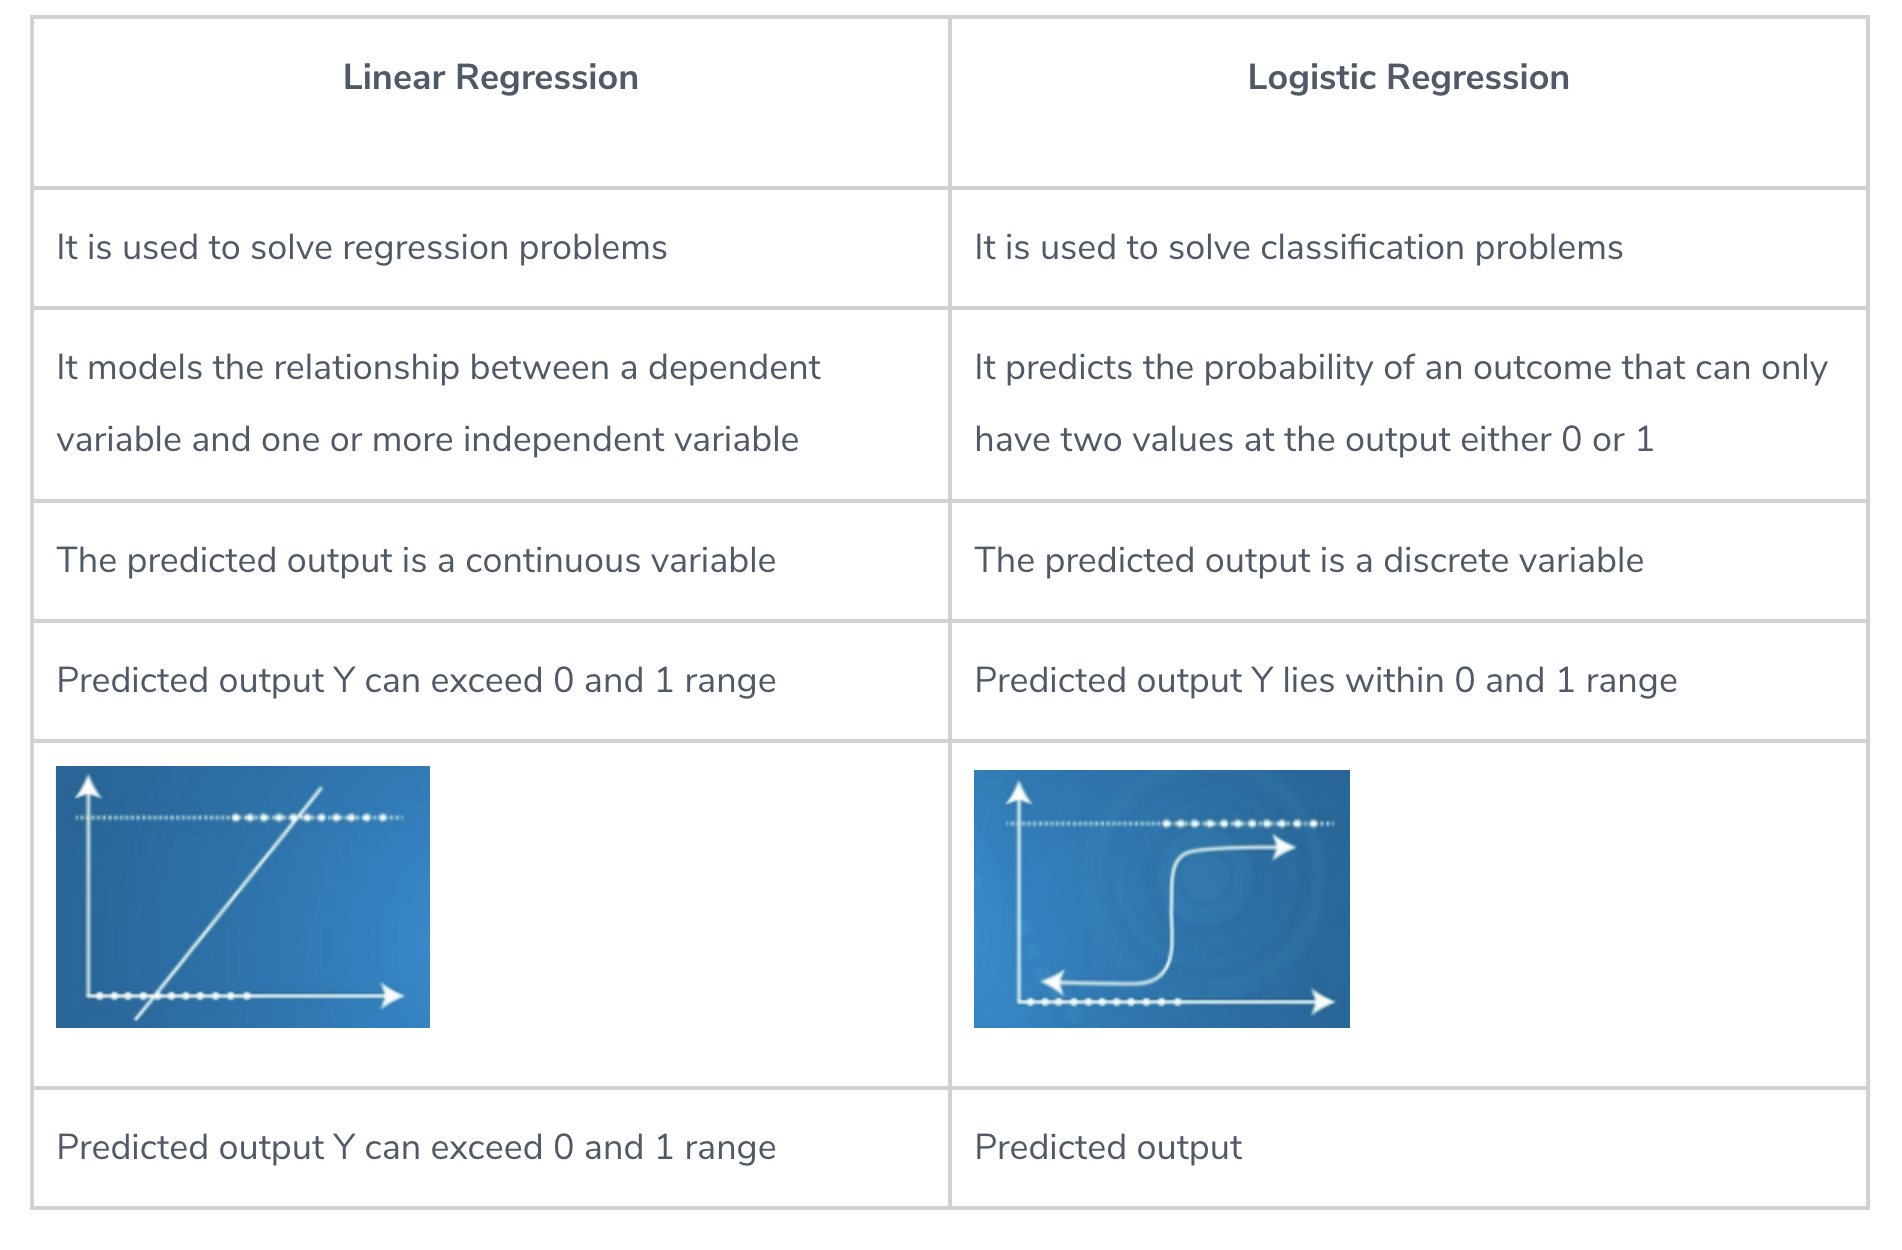

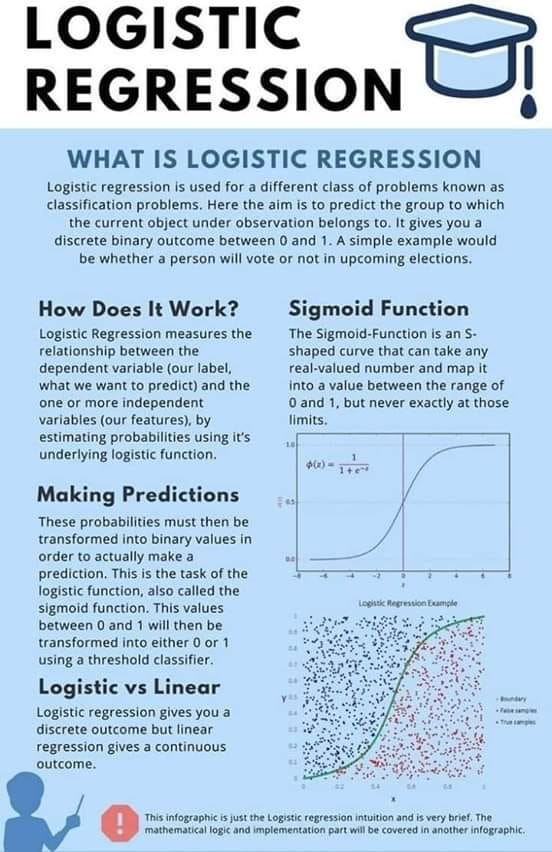

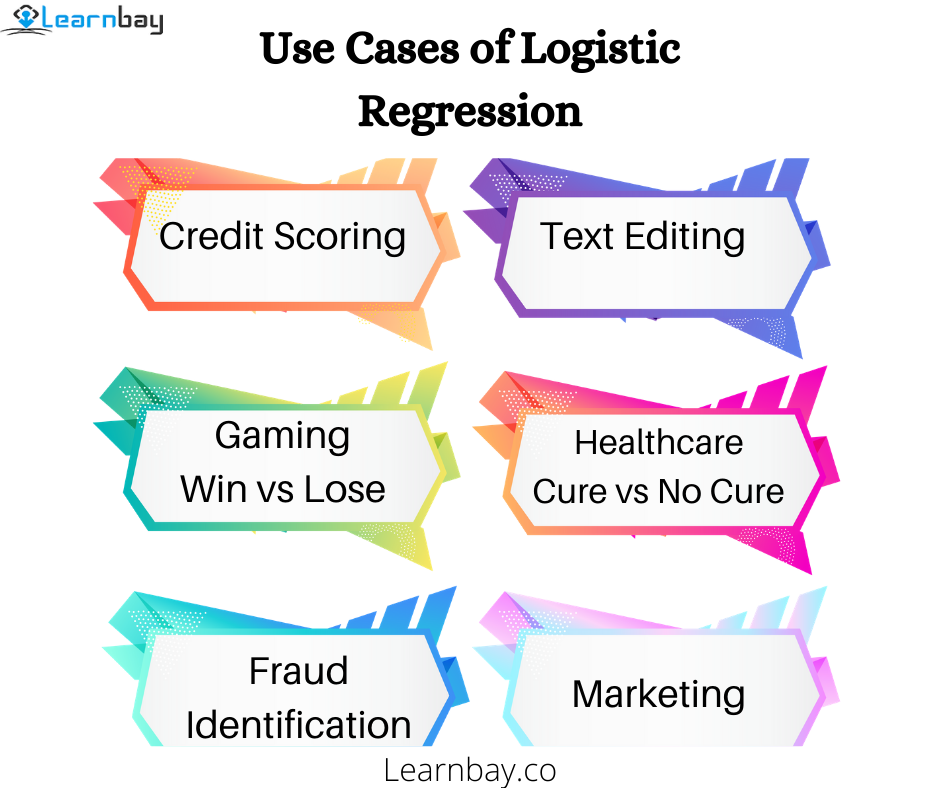

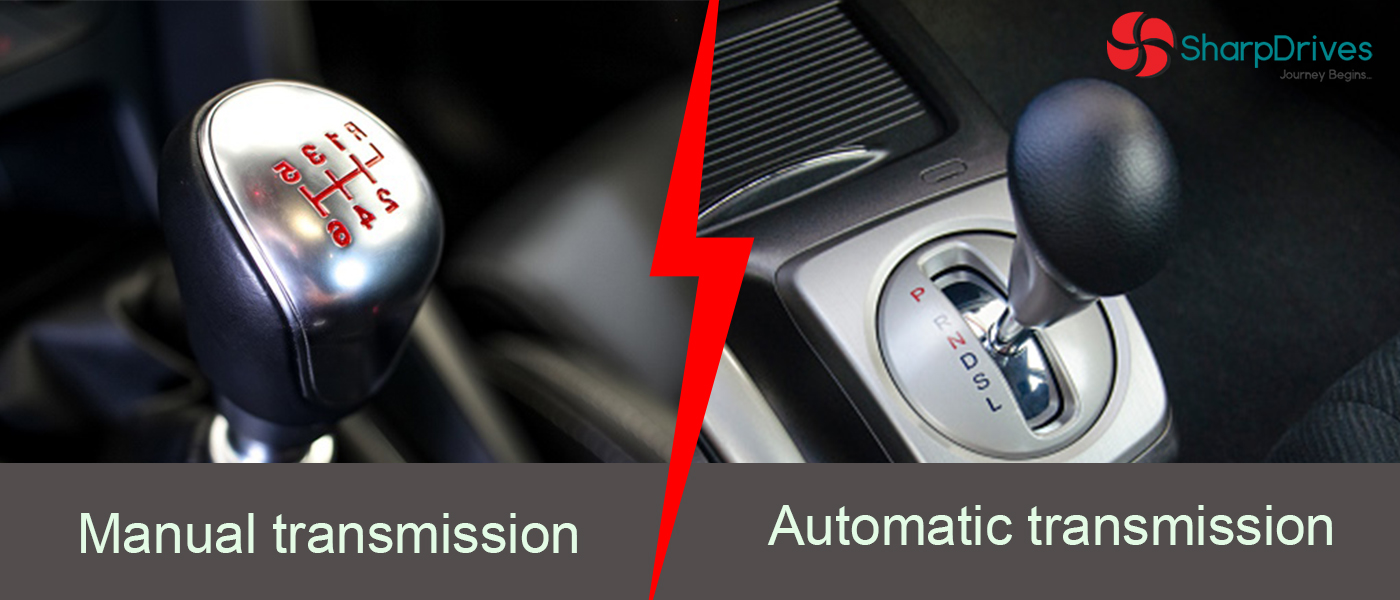

## Problem Statement: Predict the Gear System: Automatic or Manual

1. Import the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Splitting Data: Train & Test set
from sklearn.model_selection import train_test_split
# Model
from sklearn.linear_model import LogisticRegression
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score


2. Load Data

In [ ]:
cars=pd.read_csv('cars.csv')

In [ ]:
cars.head()

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
cars.Gear.value_counts()

3    15
4    12
5     5
Name: Gear, dtype: int64

In [ ]:
cars.AM.value_counts()

0    19
1    13
Name: AM, dtype: int64

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Model     32 non-null     object 
 1   MPG       32 non-null     float64
 2   Cylinder  32 non-null     int64  
 3   Disp      32 non-null     float64
 4   HP        32 non-null     int64  
 5   Drat      32 non-null     float64
 6   Wt        32 non-null     float64
 7   Qsec      32 non-null     float64
 8   VS        32 non-null     int64  
 9   AM        32 non-null     int64  
 10  Gear      32 non-null     int64  
 11  Carb      32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [ ]:
cars.describe()

,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.403125,147.531250,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.788090,70.012434,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,197.000000,118.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,201.250000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


### Exploratory Dara Analysis & Visualization

In [ ]:
cars.isnull().sum()

Model       0
MPG         0
Cylinder    0
Disp        0
HP          0
Drat        0
Wt          0
Qsec        0
VS          0
AM          0
Gear        0
Carb        0
dtype: int64

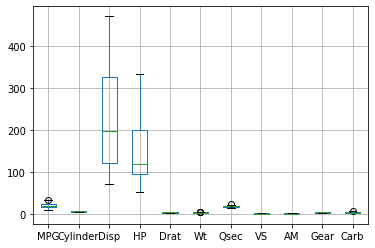

In [ ]:
cars.boxplot();

In [ ]:
counts= cars['AM'].value_counts()
counts

0    19
1    13
Name: AM, dtype: int64

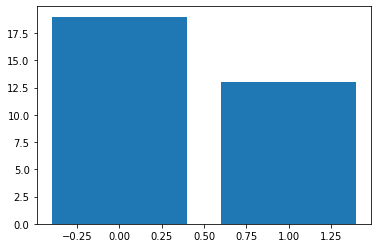

In [ ]:
plt.bar(counts.index,counts.values)
plt.show()

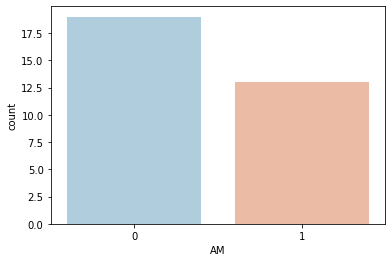

In [ ]:
sns.countplot( x='AM', data=cars, palette='RdBu_r')
plt.show()

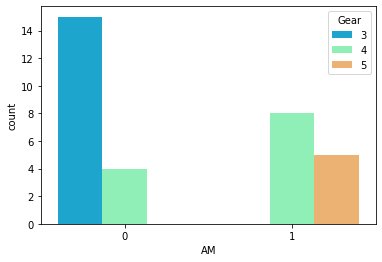

In [ ]:
sns.countplot(x='AM', hue='Gear', data=cars, palette='rainbow');

## Training & Testing Data

Car has Automatic( 1 ) or Manual ( 0 ) Gear System - AM

In [ ]:
cars.columns

Index(['Model ', 'MPG', 'Cylinder', 'Disp', 'HP', 'Drat', 'Wt', 'Qsec', 'VS',
       'AM', 'Gear', 'Carb'],
      dtype='object')

In [ ]:
x=cars.loc[: ,['MPG','HP','Wt']]
y=cars.AM

Splitting data

In [ ]:
X_train, X_test , y_train , y_test = train_test_split(x,y, test_size=0.2)

Import the Machine Learning Algorithm

In [ ]:
model= LogisticRegression()

Train the Model

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

Prediction

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
y_predict

array([0, 0, 1, 0, 1, 1, 0])

In [ ]:
y_test

4     0
21    0
25    1
23    0
28    1
8     0
3     0
Name: AM, dtype: int64

Model Evaluation

In [ ]:
accuracy_score(y_test, y_predict)

0.8571428571428571

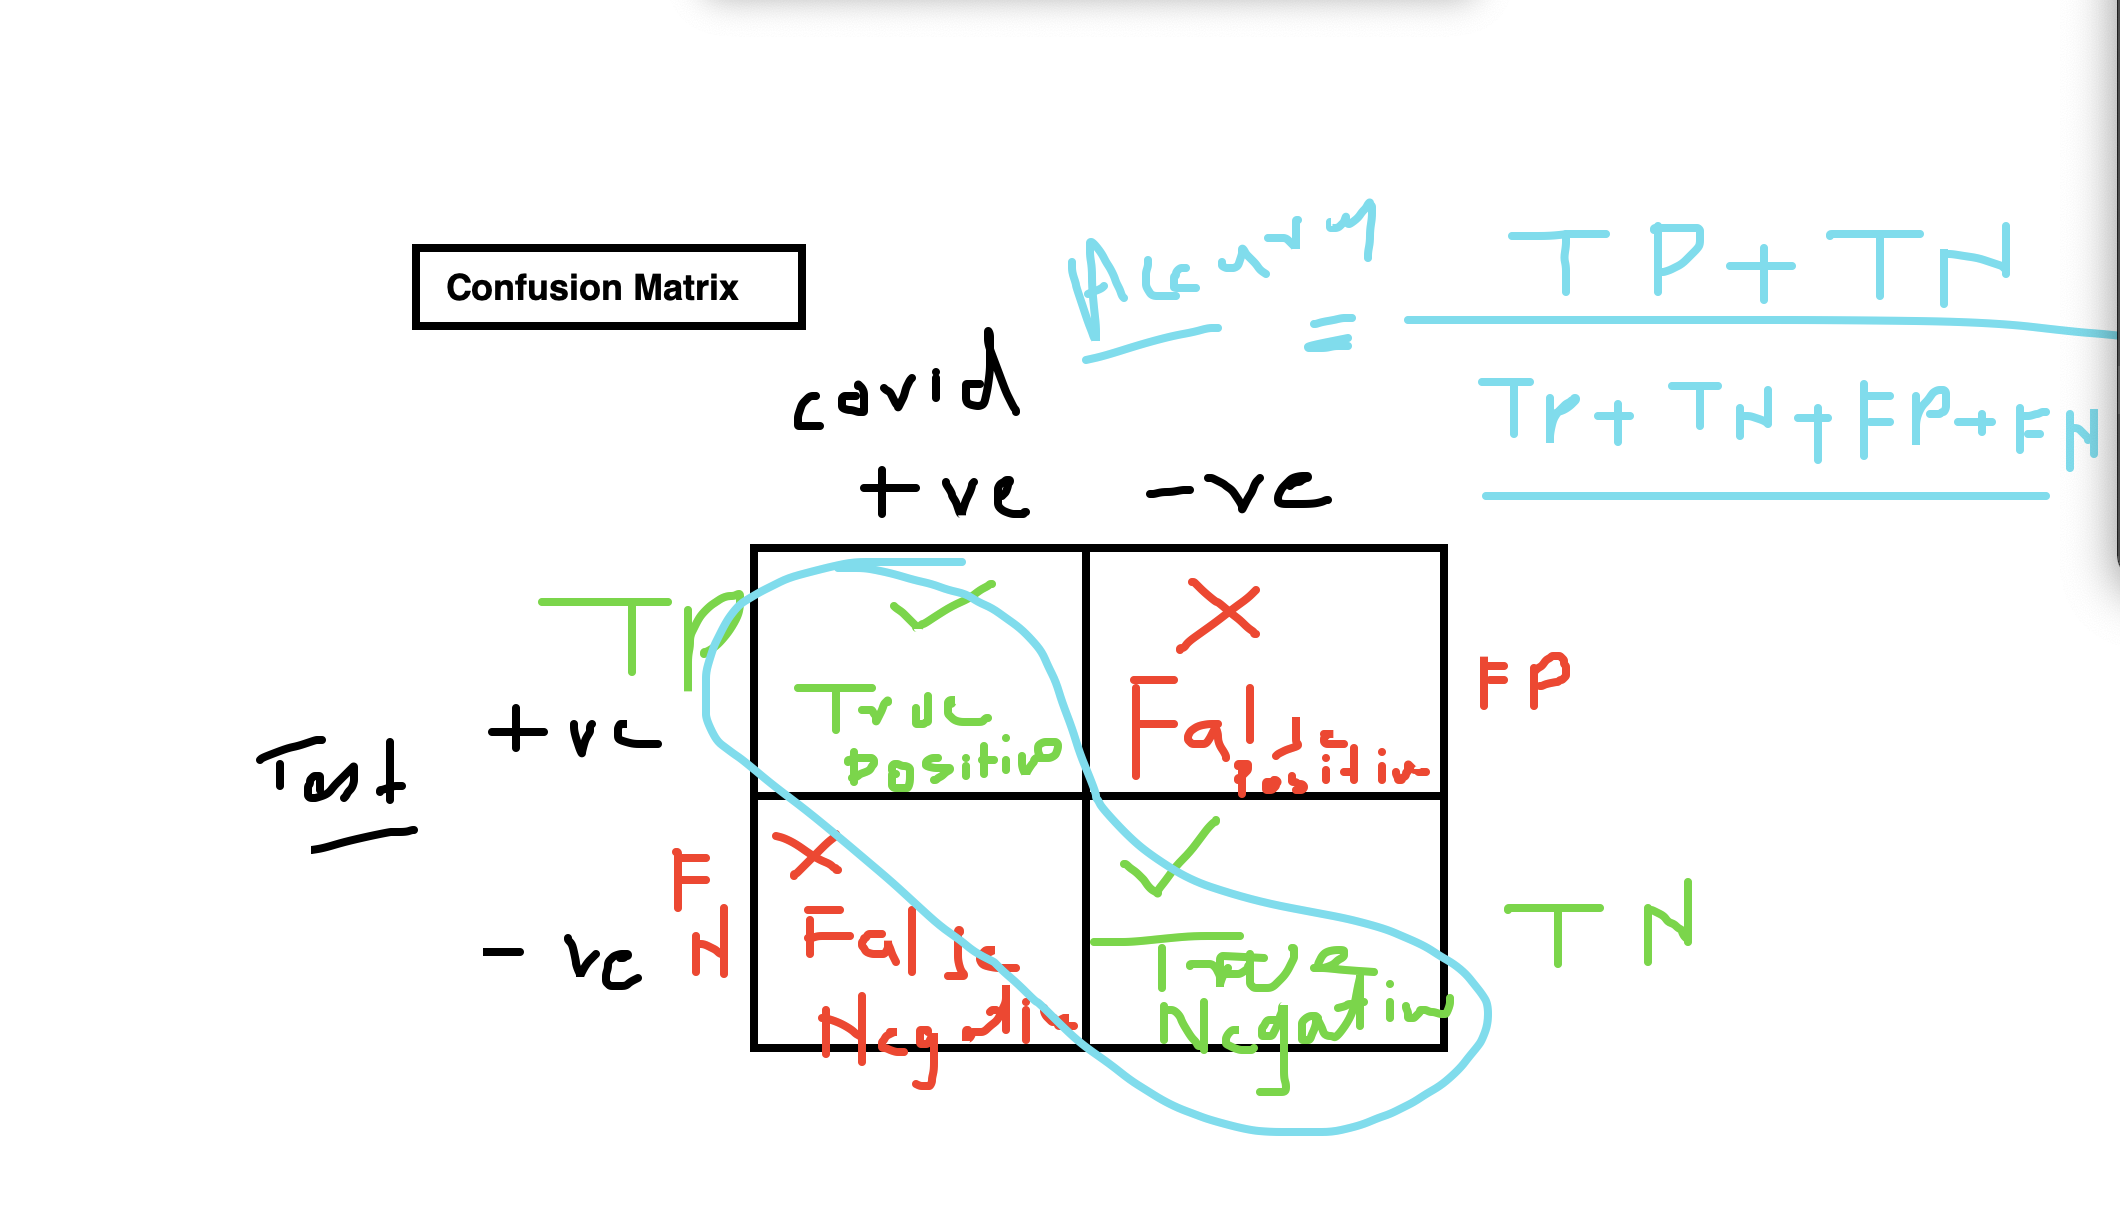

In [ ]:
confusion_matrix(y_test,y_predict)

array([[4, 1],
       [0, 2]])

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.67      1.00      0.80         2

    accuracy                           0.86         7
   macro avg       0.83      0.90      0.84         7
weighted avg       0.90      0.86      0.86         7

